# Player Scores



In [1]:
import pandas as pd
import seaborn as sns
import random as rd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from score_functions import df_score_categories
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


Importing data from tables

In [2]:
boxscore = pd.read_csv("../data/boxscore_full.csv",sep=";")
rosters = pd.read_csv("../data/rosters_full.csv",sep=";")
matchdays = pd.read_csv("../data/matches.csv",sep=";")

# Preparing Boxscore Table

* Adding Season Data
* Adding Position Data for Players

In [3]:
seasons = []
for index, row in boxscore.iterrows():
    seasons.append(matchdays.loc[matchdays['id'] == row['matchId'],'season'].sum())

boxscore['season'] = seasons

In [4]:
pos = []
for index, row in boxscore.iterrows():
    if row['name'] == 'Team':
        pos.append('999')
    else:
        pos.append(rosters.loc[(rosters['name']  == row['name']) & (rosters['team'] == row['team']) & (rosters['season'] == row['season']), 'position' ].sum() )

boxscore['position'] = pos

boxscore.head()

,matchId,team,number,name,sec,2P_P,2P_A,2P_R,3P_P,3P_A,...,Ps,As,Rs,Fs,BLs,STs,TOs,EFs,season,position
0,101059,Science City Jena,5.0,Kendall Chones,944,2,3,0.67,0,0,...,4.0,0.0,3,4,1.0,1.0,1,6.0,Saison_2014_2015,C
1,101059,Science City Jena,7.0,Ermen Reyes-Napoles,1486,2,4,0.50,1,1,...,9.0,1.0,4,4,0.0,4.0,1,15.0,Saison_2014_2015,PG
2,101059,Science City Jena,8.0,Lukas Wank,0,0,0,0.00,0,0,...,0.0,0.0,0,0,0.0,0.0,0,0.0,Saison_2014_2015,0
3,101059,Science City Jena,9.0,Lars Wendt,1491,2,2,1.00,0,2,...,4.0,1.0,1,1,0.0,0.0,4,0.0,Saison_2014_2015,PG
4,101059,Science City Jena,10.0,Sascha Leutloff,665,1,3,0.33,0,0,...,4.0,0.0,3,1,1.0,0.0,2,4.0,Saison_2014_2015,SF


Checking for players without position

In [5]:
boxscore['position'].value_counts()

PG     10604
SG      9290
PF      8213
C       7150
SF      7050
999     4152
0       2158
Name: position, dtype: int64

In [6]:
#Matching on Jersey number
pos = []
for index, row in boxscore.iterrows():
    if row['position'] == 0:
        #row['position'] = rosters.loc[(rosters['number']  == row['number']) & (rosters['team'] == row['team']) & (rosters['season'] == row['season']), 'position' ].sum()
        pos.append(rosters.loc[(rosters['number']  == row['number']) & (rosters['team'] == row['team']) & (rosters['season'] == row['season']), 'position' ].sum())
    else:
        pos.append(row['position'])
        
boxscore['position'] = pos
boxscore['position'] = boxscore['position'].apply(lambda x: str(x)[:2] if len(str(x)) > 2 and x != '999' else x)

In [7]:
boxscore['position'].value_counts()

PG     10922
SG      9766
PF      8529
C       7572
SF      7363
999     4152
0        313
Name: position, dtype: int64

Filling the remaining Positions by proportion

In [8]:
pos = []
for index, row in boxscore.iterrows():
    if row['position'] == 0:
        p = rd.randint(1,10000)
        if p >= 1 and p < 2474:
            pos.append('PG')
        elif p >= 2474 and p < 4686:
            pos.append('SG')
        elif p >= 4686 and p < 6619:
            pos.append('PF')
        elif p >= 6619 and p < 8333:
            pos.append('C')
        else:
            pos.append('SF')
    else:
        pos.append(row['position'])
        
boxscore['position'] = pos
boxscore['position'].value_counts()


PG     10999
SG      9833
PF      8595
C       7616
SF      7422
999     4152
Name: position, dtype: int64

# Calculation on the Score values

In [9]:
#Whiskers
#points, assists, efg, turnover, steals & blocks, rebounds
pg_uw = [26,10,1.1,7,2,8,1]
pg_lw = [0,0,0.136,0,0,0,0]
sg_uw = [27,7,1.115,4,2,8,1]
sg_lw = [0,0,0.136,0,0,0,0]
sf_uw = [24,4,1.111,4,2,8,1]
sf_lw = [0,0,0.136,0,0,0,0]
pf_uw = [25,4,1.115,4,2,11,1]
pf_lw = [0,0,0.136,0,0,0,0]
c_uw = [23,2,1.2,4,4,14,1]
c_lw = [0,0,0.083,0,0,0,0]

#TODO get the whiskers automatically

In [10]:
boxscore = df_score_categories(boxscore)

boxscore.query("matchId == 108956")

Everything went well


,matchId,team,number,name,sec,2P_P,2P_A,2P_R,3P_P,3P_A,...,EFs,season,position,Points_score,Assist_score,EFG_score,TO_score,STBL_score,Reb_score,time_score
42277,108956,Medipolis SC Jena,2.0,Jonathan Malu Kazadi Muyombu,1058,2,3,0.67,0,1,...,12.0,Saison_2021_2022,SG,0.148148,0.571429,0.371808,1.000000,0.5,0.625000,0.440833
42278,108956,Medipolis SC Jena,5.0,Nico Brauner,852,0,0,0.00,2,4,...,5.0,Saison_2021_2022,SG,0.222222,0.142857,0.627171,1.000000,0.0,0.000000,0.355000
42279,108956,Medipolis SC Jena,10.0,Julius Wolf,1596,6,8,0.75,0,3,...,11.0,Saison_2021_2022,PF,0.480000,0.250000,0.418238,0.750000,1.0,0.181818,0.665000
42280,108956,Medipolis SC Jena,11.0,Rayshawn Laron Simmons,1940,4,7,0.57,1,3,...,14.0,Saison_2021_2022,PG,0.423077,1.000000,0.334371,0.714286,0.0,0.250000,0.808333
42281,108956,Medipolis SC Jena,13.0,Clinton Daniel Chapman,892,2,2,1.00,0,2,...,0.0,Saison_2021_2022,PF,0.160000,0.250000,0.201566,0.500000,0.0,0.090909,0.371667
42282,108956,Medipolis SC Jena,16.0,Moritz Plescher,0,0,0,0.00,0,0,...,0.0,Saison_2021_2022,SG,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
42283,108956,Medipolis SC Jena,21.0,Rafael Alberton Rodrigues,67,0,0,0.00,0,0,...,0.0,Saison_2021_2022,C,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.027917
42284,108956,Medipolis SC Jena,25.0,Lorenz Bank,0,0,0,0.00,0,0,...,0.0,Saison_2021_2022,SF,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
42285,108956,Medipolis SC Jena,33.0,Brandon Omar Thomas,1852,2,6,0.33,1,5,...,6.0,Saison_2021_2022,SF,0.375000,0.000000,0.215542,0.750000,1.0,0.500000,0.771667
42286,108956,Medipolis SC Jena,35.0,Stephan Haukohl,907,2,3,0.67,0,1,...,8.0,Saison_2021_2022,PF,0.240000,0.000000,0.371808,1.000000,1.0,0.181818,0.377917


In [11]:
#weights of each category were determined in a separate Notebook 
#TODO Notebook with Linear regression

weights = [2.553481138020245, 2.761039332198105, 18.240946894718423, 8.907067731505206, 0.385604501940116, 8.325292364515123]


Creating column with NP_Score 


In [12]:
NP_Score = []

for index,row in boxscore.iterrows():
    if row['name'] == 'Team' or row['sec'] == 0:
        NP_Score.append(0.0)
    else:
        #SUM(weight * categoy)  / time_score
        sum = weights[0] * row['Points_score'] + weights[1] * row['Assist_score'] + weights[2] * row['EFG_score'] + weights[3] * row['TO_score'] + weights[4] * row['STBL_score'] + weights[5] * row['Reb_score']
        NP_Score.append(sum * row['time_score'])

boxscore['NP_Score'] = NP_Score

boxscore.query("matchId == 108956")

,matchId,team,number,name,sec,2P_P,2P_A,2P_R,3P_P,3P_A,...,season,position,Points_score,Assist_score,EFG_score,TO_score,STBL_score,Reb_score,time_score,NP_Score
42277,108956,Medipolis SC Jena,2.0,Jonathan Malu Kazadi Muyombu,1058,2,3,0.67,0,1,...,Saison_2021_2022,SG,0.148148,0.571429,0.371808,1.000000,0.5,0.625000,0.440833,10.157390
42278,108956,Medipolis SC Jena,5.0,Nico Brauner,852,0,0,0.00,2,4,...,Saison_2021_2022,SG,0.222222,0.142857,0.627171,1.000000,0.0,0.000000,0.355000,7.564740
42279,108956,Medipolis SC Jena,10.0,Julius Wolf,1596,6,8,0.75,0,3,...,Saison_2021_2022,PF,0.480000,0.250000,0.418238,0.750000,1.0,0.181818,0.665000,12.052842
42280,108956,Medipolis SC Jena,11.0,Rayshawn Laron Simmons,1940,4,7,0.57,1,3,...,Saison_2021_2022,PG,0.423077,1.000000,0.334371,0.714286,0.0,0.250000,0.808333,14.860489
42281,108956,Medipolis SC Jena,13.0,Clinton Daniel Chapman,892,2,2,1.00,0,2,...,Saison_2021_2022,PF,0.160000,0.250000,0.201566,0.500000,0.0,0.090909,0.371667,3.711446
42282,108956,Medipolis SC Jena,16.0,Moritz Plescher,0,0,0,0.00,0,0,...,Saison_2021_2022,SG,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
42283,108956,Medipolis SC Jena,21.0,Rafael Alberton Rodrigues,67,0,0,0.00,0,0,...,Saison_2021_2022,C,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.027917,0.248656
42284,108956,Medipolis SC Jena,25.0,Lorenz Bank,0,0,0,0.00,0,0,...,Saison_2021_2022,SF,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
42285,108956,Medipolis SC Jena,33.0,Brandon Omar Thomas,1852,2,6,0.33,1,5,...,Saison_2021_2022,SF,0.375000,0.000000,0.215542,0.750000,1.0,0.500000,0.771667,12.437572
42286,108956,Medipolis SC Jena,35.0,Stephan Haukohl,907,2,3,0.67,0,1,...,Saison_2021_2022,PF,0.240000,0.000000,0.371808,1.000000,1.0,0.181818,0.377917,6.878585


In [13]:
boxscore['NP_Score'].max()

34.520958761057805

In [16]:
#max_points = sum(weights)
max_points = 41.17343196289722

In [18]:
boxscore['NP_%'] = boxscore['NP_Score'].apply(lambda x: (x / max_points) * 100)
boxscore.query("matchId == 108956")

,matchId,team,number,name,sec,2P_P,2P_A,2P_R,3P_P,3P_A,...,position,Points_score,Assist_score,EFG_score,TO_score,STBL_score,Reb_score,time_score,NP_Score,NP_%
42277,108956,Medipolis SC Jena,2.0,Jonathan Malu Kazadi Muyombu,1058,2,3,0.67,0,1,...,SG,0.148148,0.571429,0.371808,1.000000,0.5,0.625000,0.440833,10.157390,24.669767
42278,108956,Medipolis SC Jena,5.0,Nico Brauner,852,0,0,0.00,2,4,...,SG,0.222222,0.142857,0.627171,1.000000,0.0,0.000000,0.355000,7.564740,18.372868
42279,108956,Medipolis SC Jena,10.0,Julius Wolf,1596,6,8,0.75,0,3,...,PF,0.480000,0.250000,0.418238,0.750000,1.0,0.181818,0.665000,12.052842,29.273348
42280,108956,Medipolis SC Jena,11.0,Rayshawn Laron Simmons,1940,4,7,0.57,1,3,...,PG,0.423077,1.000000,0.334371,0.714286,0.0,0.250000,0.808333,14.860489,36.092423
42281,108956,Medipolis SC Jena,13.0,Clinton Daniel Chapman,892,2,2,1.00,0,2,...,PF,0.160000,0.250000,0.201566,0.500000,0.0,0.090909,0.371667,3.711446,9.014178
42282,108956,Medipolis SC Jena,16.0,Moritz Plescher,0,0,0,0.00,0,0,...,SG,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
42283,108956,Medipolis SC Jena,21.0,Rafael Alberton Rodrigues,67,0,0,0.00,0,0,...,C,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.027917,0.248656,0.603923
42284,108956,Medipolis SC Jena,25.0,Lorenz Bank,0,0,0,0.00,0,0,...,SF,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
42285,108956,Medipolis SC Jena,33.0,Brandon Omar Thomas,1852,2,6,0.33,1,5,...,SF,0.375000,0.000000,0.215542,0.750000,1.0,0.500000,0.771667,12.437572,30.207762
42286,108956,Medipolis SC Jena,35.0,Stephan Haukohl,907,2,3,0.67,0,1,...,PF,0.240000,0.000000,0.371808,1.000000,1.0,0.181818,0.377917,6.878585,16.706367


In [19]:
boxscore_NP_Score = boxscore.copy()
%store boxscore_NP_Score

Stored 'boxscore_NP_Score' (DataFrame)


In [30]:
boxscore['NP_%'].max()

83.84280132918192

In [38]:
boxscore['NP_%'].mean()

18.506506752650733

In [36]:
max_finder = boxscore[boxscore['sec'] <= 2400]
max_finder['NP_%'].max()

77.0742738967143

In [37]:
max_finder[max_finder['NP_%'] >75]

,matchId,team,number,name,sec,2P_P,2P_A,2P_R,3P_P,3P_A,...,position,Points_score,Assist_score,EFG_score,TO_score,STBL_score,Reb_score,time_score,NP_Score,NP_%
48381,108850,Eisbären Bremerhaven,4.0,Armani T'Bori Moore,2269,8,12,0.67,4,6,...,SF,1.0,1.0,0.604103,1.0,0.0,1.0,0.945417,31.734124,77.074274


In [20]:
corr_test_df = boxscore.copy()

corr_test_df.drop(columns=['number','name','2P_P', '2P_A', '2P_R',
       '3P_P', '3P_A', '3P_R', 'FG_P', 'FG_A', 'FG_R', 'FT_P', 'FT_A', 'FT_R',
        'As', 'Rs', 'Fs', 'BLs', 'STs', 'TOs', 'season', 'position'], inplace=True)

# group by matchId and team
corr_test_df = corr_test_df.groupby(["matchId", "team"]).sum().reset_index()

#drop OT games and games with faulty data
corr_test_df = corr_test_df[corr_test_df["sec"] >= 11800]
corr_test_df = corr_test_df[corr_test_df["sec"] <= 12200]


corr_test_df.head()

,matchId,team,sec,Ps,EFs,Points_score,Assist_score,EFG_score,TO_score,STBL_score,Reb_score,time_score,NP_Score,NP_%
2,100003,ETB Wohnbau Baskets Essen,12000,96.0,111.0,3.388204,2.100000,2.731662,9.071429,5.25,3.336039,5.0,95.204204,231.227273
3,100003,NINERS CHEMNITZ,12000,82.0,77.0,3.068110,1.092857,1.829373,6.392857,3.00,3.136364,5.0,79.355556,192.734858
4,100004,Bayer Giants Leverkusen,12000,63.0,62.0,2.503575,2.192857,1.488727,6.071429,3.00,2.814935,5.0,82.478461,200.319616
5,100004,RASTA Vechta,12000,71.0,107.0,2.831439,2.671429,3.583034,5.785714,1.75,3.918831,5.0,95.278902,231.408697
6,100005,OeTTINGER Rockets Gotha,12000,70.0,71.0,2.786200,1.878571,2.161948,7.357143,2.00,3.230519,5.0,78.205210,189.940955


In [21]:
def diff_calculator(df : pd.DataFrame):
    EF_diff = []
    NP_Score_diff = []
    NP_Per_diff = []
    P_diff = []
    for index, row in df.iterrows():
        EF_diff.append(row['EFs'] - df.loc[(df['matchId'] == row['matchId']) & (df['team'] != row['team']), 'EFs'].sum())
        NP_Score_diff.append(row['NP_Score'] - df.loc[(df['matchId'] == row['matchId']) & (df['team'] != row['team']), 'NP_Score'].sum())
        NP_Per_diff.append(row['NP_%'] - df.loc[(df['matchId'] == row['matchId']) & (df['team'] != row['team']), 'NP_%'].sum())
        P_diff.append(row['Ps'] - df.loc[(df['matchId'] == row['matchId']) & (df['team'] != row['team']), 'Ps'].sum())

    df['EF_diff'] = EF_diff
    df['NP_Score_diff'] = NP_Score_diff
    df['NP_%_diff'] = NP_Per_diff
    df['P_diff'] = P_diff

    return df

In [22]:
corr_test_df = diff_calculator(corr_test_df)
corr_test_df.head()

,matchId,team,sec,Ps,EFs,Points_score,Assist_score,EFG_score,TO_score,STBL_score,Reb_score,time_score,NP_Score,NP_%,EF_diff,NP_Score_diff,NP_%_diff,P_diff
2,100003,ETB Wohnbau Baskets Essen,12000,96.0,111.0,3.388204,2.100000,2.731662,9.071429,5.25,3.336039,5.0,95.204204,231.227273,34.0,15.848648,38.492415,14.0
3,100003,NINERS CHEMNITZ,12000,82.0,77.0,3.068110,1.092857,1.829373,6.392857,3.00,3.136364,5.0,79.355556,192.734858,-34.0,-15.848648,-38.492415,-14.0
4,100004,Bayer Giants Leverkusen,12000,63.0,62.0,2.503575,2.192857,1.488727,6.071429,3.00,2.814935,5.0,82.478461,200.319616,-45.0,-12.800441,-31.089081,-8.0
5,100004,RASTA Vechta,12000,71.0,107.0,2.831439,2.671429,3.583034,5.785714,1.75,3.918831,5.0,95.278902,231.408697,45.0,12.800441,31.089081,8.0
6,100005,OeTTINGER Rockets Gotha,12000,70.0,71.0,2.786200,1.878571,2.161948,7.357143,2.00,3.230519,5.0,78.205210,189.940955,0.0,-2.179415,-5.293255,-2.0


In [23]:
corr_test_df.drop(columns=['matchId', 'sec', 'Points_score', 'Assist_score', 'EFG_score', 'TO_score', 'STBL_score', 'time_score'],inplace=True)
corr_test_df.head()

,team,Ps,EFs,Reb_score,NP_Score,NP_%,EF_diff,NP_Score_diff,NP_%_diff,P_diff
2,ETB Wohnbau Baskets Essen,96.0,111.0,3.336039,95.204204,231.227273,34.0,15.848648,38.492415,14.0
3,NINERS CHEMNITZ,82.0,77.0,3.136364,79.355556,192.734858,-34.0,-15.848648,-38.492415,-14.0
4,Bayer Giants Leverkusen,63.0,62.0,2.814935,82.478461,200.319616,-45.0,-12.800441,-31.089081,-8.0
5,RASTA Vechta,71.0,107.0,3.918831,95.278902,231.408697,45.0,12.800441,31.089081,8.0
6,OeTTINGER Rockets Gotha,70.0,71.0,3.230519,78.205210,189.940955,0.0,-2.179415,-5.293255,-2.0


In [26]:
corr_test_df.drop(columns= ['Reb_score', 'EF_diff'], inplace=True)
corr_test_df.corr()

,Ps,EFs,NP_Score,NP_%,NP_Score_diff,NP_%_diff,P_diff
Ps,1.000000,0.868095,0.772555,0.772555,0.557265,0.557265,0.626566
EFs,0.868095,1.000000,0.815504,0.815504,0.699948,0.699948,0.744054
NP_Score,0.772555,0.815504,1.000000,1.000000,0.729658,0.729658,0.660987
NP_%,0.772555,0.815504,1.000000,1.000000,0.729658,0.729658,0.660987
NP_Score_diff,0.557265,0.699948,0.729658,0.729658,1.000000,1.000000,0.901287
NP_%_diff,0.557265,0.699948,0.729658,0.729658,1.000000,1.000000,0.901287
P_diff,0.626566,0.744054,0.660987,0.660987,0.901287,0.901287,1.000000


In [29]:
corr_test_df.query("NP_Score_diff < 0 and P_diff > 0")

,team,Ps,EFs,NP_Score,NP_%,NP_Score_diff,NP_%_diff,P_diff
42,Hamburg Towers,88.0,90.0,92.051216,223.569450,-5.963611,-14.484124,1.0
50,ETB Wohnbau Baskets Essen,69.0,80.0,86.520905,210.137705,-1.603545,-3.894610,10.0
53,rent4office Nürnberg,64.0,71.0,82.892521,201.325266,-3.811005,-9.255980,1.0
101,finke baskets,74.0,65.0,73.343537,178.133165,-8.466568,-20.563182,2.0
114,ETB Wohnbau Baskets Essen,76.0,95.0,84.335880,204.830823,-0.024469,-0.059430,7.0
...,...,...,...,...,...,...,...,...
4040,Artland Dragons,86.0,97.0,100.963962,245.216289,-0.911694,-2.214278,1.0
4051,RASTA Vechta,69.0,78.0,86.844131,210.922741,-5.980461,-14.525050,2.0
4059,Tigers Tübingen,95.0,106.0,90.719191,220.334295,-5.987914,-14.543150,5.0
4118,Eisbären Bremerhaven,95.0,94.0,89.366946,217.050029,-5.430066,-13.188275,6.0


In [39]:
corr_demo = corr_test_df.copy()

In [40]:
corr_demo.head()

,team,Ps,EFs,NP_Score,NP_%,NP_Score_diff,NP_%_diff,P_diff
2,ETB Wohnbau Baskets Essen,96.0,111.0,95.204204,231.227273,15.848648,38.492415,14.0
3,NINERS CHEMNITZ,82.0,77.0,79.355556,192.734858,-15.848648,-38.492415,-14.0
4,Bayer Giants Leverkusen,63.0,62.0,82.478461,200.319616,-12.800441,-31.089081,-8.0
5,RASTA Vechta,71.0,107.0,95.278902,231.408697,12.800441,31.089081,8.0
6,OeTTINGER Rockets Gotha,70.0,71.0,78.205210,189.940955,-2.179415,-5.293255,-2.0


In [41]:
corr_demo.drop(columns=['Ps','NP_Score','NP_%', 'NP_Score_diff' ], inplace=True)

In [42]:
corr_demo.head()

,team,EFs,NP_%_diff,P_diff
2,ETB Wohnbau Baskets Essen,111.0,38.492415,14.0
3,NINERS CHEMNITZ,77.0,-38.492415,-14.0
4,Bayer Giants Leverkusen,62.0,-31.089081,-8.0
5,RASTA Vechta,107.0,31.089081,8.0
6,OeTTINGER Rockets Gotha,71.0,-5.293255,-2.0


In [43]:
corr_demo.rename(columns={'team' : 'Team' , 'EFs' : 'Efficiency', 'NP_%_diff' : 'NP-Score', 'P_diff' : 'Game Success'}, inplace=True)
corr_demo.corr()

,EFs,NP-Score,Game Success
EFs,1.000000,0.699948,0.744054
NP-Score,0.699948,1.000000,0.901287
Game Success,0.744054,0.901287,1.000000


<AxesSubplot:>

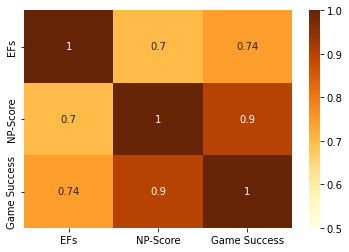

In [45]:
sns.heatmap(corr_demo.corr(), vmin=0.5, vmax=1.00, cmap="YlOrBr", annot=True)